## **Visão geral**

**Descrição**

Esta competição é o enunciado do problema final do Recognizance'24, o evento de ML do Prastuti, o festival do Departamento Elétrico do IIT BHU.

É importante que as empresas de cartão de crédito sejam capazes de reconhecer transações fraudulentas de cartão de crédito para que os clientes não sejam cobrados por itens que não compraram.

Formular um modelo de ML para detectar transações fraudulentas de cartão de crédito



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# **Exploração dos Dados**

## **Análise Inicial**

In [2]:
train = pd.read_csv('dados/train.csv')
test = pd.read_csv('dados/test.csv')

In [3]:
train.head()

,id,Time,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,...,feat21,feat22,feat23,feat24,feat25,feat26,feat27,feat28,Transaction_Amount,IsFraud
0,0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,...,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98,0
1,1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,...,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00,0
2,2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,...,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69,0
3,3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,...,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00,0
4,4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,...,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 32 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  150000 non-null  int64  
 1   Time                150000 non-null  float64
 2   feat1               150000 non-null  float64
 3   feat2               150000 non-null  float64
 4   feat3               150000 non-null  float64
 5   feat4               150000 non-null  float64
 6   feat5               150000 non-null  float64
 7   feat6               150000 non-null  float64
 8   feat7               150000 non-null  float64
 9   feat8               150000 non-null  float64
 10  feat9               150000 non-null  float64
 11  feat10              150000 non-null  float64
 12  feat11              150000 non-null  float64
 13  feat12              150000 non-null  float64
 14  feat13              150000 non-null  float64
 15  feat14              150000 non-nul

In [5]:
train.describe()

,id,Time,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,...,feat21,feat22,feat23,feat24,feat25,feat26,feat27,feat28,Transaction_Amount,IsFraud
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,74999.500000,49785.422340,0.069456,-0.003674,0.739860,0.104810,-0.254623,0.151934,-0.165443,0.166254,...,-0.032077,-0.068876,-0.059646,-0.000776,0.161152,0.021575,0.014138,0.020323,71.065194,0.001793
std,43301.414527,18733.655609,1.346553,1.161502,1.012801,1.230909,1.048268,1.182964,0.802668,0.691267,...,0.404916,0.573755,0.323272,0.584270,0.385175,0.473795,0.223692,0.163429,158.712510,0.042310
min,0.000000,0.000000,-22.173926,-44.247914,-19.088980,-5.069484,-21.090735,-25.659750,-31.179799,-28.903442,...,-14.689621,-7.351378,-11.958588,-2.827444,-3.958591,-1.413857,-9.234767,-4.454059,0.000000,0.000000
25%,37499.750000,39411.000000,-0.844248,-0.621724,0.181373,-0.738399,-0.912254,-0.590892,-0.667139,-0.078114,...,-0.185077,-0.464426,-0.177546,-0.321495,-0.078682,-0.310948,-0.044800,0.001623,6.990000,0.000000
50%,74999.500000,53785.000000,0.671327,0.003677,0.826497,0.095342,-0.322525,-0.068690,-0.144551,0.125052,...,-0.044828,-0.045844,-0.068170,0.043048,0.181701,-0.087927,0.017590,0.024098,24.900000,0.000000
75%,112499.250000,63833.000000,1.171271,0.753340,1.360362,0.967657,0.242796,0.492931,0.334553,0.396056,...,0.100896,0.309938,0.047399,0.388969,0.425791,0.269844,0.073776,0.065778,74.000000,0.000000
max,149999.000000,73899.000000,2.390816,16.068473,6.145578,12.547997,34.581260,15.082516,23.256066,18.270586,...,22.062945,6.163541,12.734391,4.572739,3.111624,3.119824,6.457839,23.263746,6513.350000,1.000000


In [6]:
test.head()

,id,Time,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,...,feat20,feat21,feat22,feat23,feat24,feat25,feat26,feat27,feat28,Transaction_Amount
0,150000,73899,-0.681234,-0.371212,0.385966,0.955703,2.064078,0.338827,-0.539452,-0.254046,...,0.183560,-0.253324,0.266668,-0.153829,0.455969,-0.503628,0.257588,-0.456685,-0.298919,30.42
1,150001,73899,-1.098947,-0.959377,0.324934,0.703908,1.090582,-1.595909,0.584548,0.260069,...,0.334764,0.130108,0.676928,-0.161070,-0.638011,-0.273424,0.711132,0.349967,0.141233,23.00
2,150002,73899,0.977029,-0.270984,0.471526,-1.232570,0.957537,-0.636602,-0.953060,-1.491744,...,0.355728,0.517912,1.175087,-0.325895,-0.362636,0.306037,0.004828,0.037389,0.058222,198.00
3,150003,73900,1.176658,-0.225816,-0.246600,0.015513,1.103831,1.229516,-1.527098,-0.459769,...,-0.152613,-0.104600,0.003800,-0.023180,-0.458338,0.481427,-0.381415,0.080165,0.027372,9.99
4,150004,73900,0.804828,-0.272967,0.959910,-1.117567,0.395748,0.589855,1.059880,-1.101203,...,-0.127818,-0.011849,0.078540,-0.241700,0.010130,0.302614,-0.259568,0.023127,0.056957,239.00


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69129 entries, 0 to 69128
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  69129 non-null  int64  
 1   Time                69129 non-null  int64  
 2   feat1               69129 non-null  float64
 3   feat2               69129 non-null  float64
 4   feat3               69129 non-null  float64
 5   feat4               69129 non-null  float64
 6   feat5               69129 non-null  float64
 7   feat6               69129 non-null  float64
 8   feat7               69129 non-null  float64
 9   feat8               69129 non-null  float64
 10  feat9               69129 non-null  float64
 11  feat10              69129 non-null  float64
 12  feat11              69129 non-null  float64
 13  feat12              69129 non-null  float64
 14  feat13              69129 non-null  float64
 15  feat14              69129 non-null  float64
 16  feat

In [8]:
test.describe()

,id,Time,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,...,feat20,feat21,feat22,feat23,feat24,feat25,feat26,feat27,feat28,Transaction_Amount
count,69129.000000,69129.000000,69129.000000,69129.000000,69129.000000,69129.000000,69129.000000,69129.000000,69129.000000,69129.000000,...,69129.000000,69129.000000,69129.000000,69129.000000,69129.000000,69129.000000,69129.000000,69129.000000,69129.000000,69129.000000
mean,184564.000000,89700.231495,0.153621,0.024798,-0.091934,0.161219,0.271489,-0.007837,0.115694,0.040389,...,-0.014270,-0.028866,-0.011745,-0.030751,-0.007801,0.043401,-0.015492,0.013809,0.010781,56.149780
std,19955.967716,15119.656332,1.494379,0.706959,0.885260,1.148045,1.300909,1.296690,0.959655,1.087216,...,0.430256,0.459146,0.645217,0.305893,0.611798,0.439325,0.473033,0.253057,0.167734,131.414806
min,150000.000000,73899.000000,-29.807725,-19.105436,-22.092656,-39.517039,-19.722872,-5.263650,-3.210967,-37.591259,...,-18.679066,-9.981414,-8.748979,-8.881340,-2.836285,-3.868173,-1.858672,-6.438425,-4.551680,0.000000
25%,167282.000000,78165.000000,-0.849946,-0.444879,-0.594470,-0.486516,-0.534338,-0.829899,-0.593737,-0.671718,...,-0.191948,-0.206937,-0.487391,-0.169539,-0.359900,-0.243331,-0.335526,-0.062189,-0.048799,4.490000
50%,184564.000000,82812.000000,-0.013829,-0.031276,-0.172084,0.123914,0.426266,-0.042488,0.069868,-0.018824,...,-0.057501,-0.039244,0.007961,-0.045781,0.024756,0.058835,-0.080943,0.011708,0.014929,17.900000
75%,201846.000000,99073.000000,1.292617,0.396541,0.292818,0.891948,1.174539,0.780126,0.856364,0.613933,...,0.102060,0.125989,0.462415,0.086374,0.417505,0.356515,0.226861,0.082935,0.069302,56.800000
max,219128.000000,120580.000000,2.430494,6.867874,15.878405,13.678867,4.241399,12.268942,5.859398,20.976643,...,12.349838,22.003517,3.390957,8.638156,4.215919,2.336747,3.402344,13.123618,10.906934,7475.000000


## **Visualização**

Histograma do valor da transação

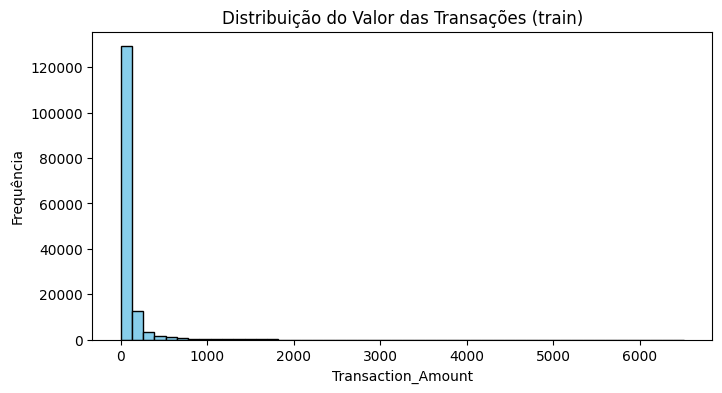

In [9]:
plt.figure(figsize=(8, 4))
train['Transaction_Amount'].plot(kind='hist', bins=50, color='skyblue', edgecolor='black')
plt.title('Distribuição do Valor das Transações (train)')
plt.xlabel('Transaction_Amount')
plt.ylabel('Frequência')
plt.show()

Contagem de fraudes vs não fraudes

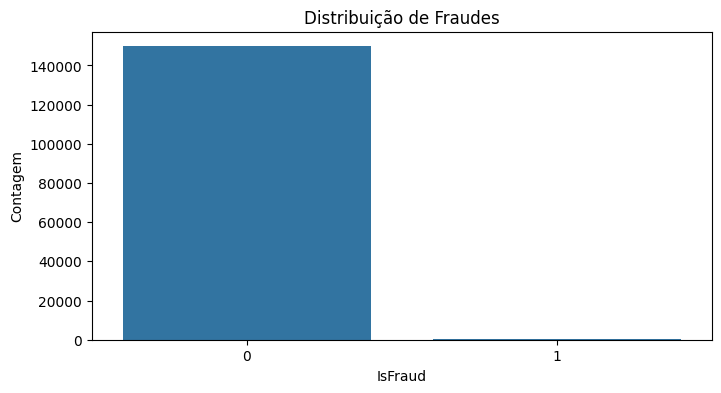

In [11]:
plt.figure(figsize=(8, 4))
sns.countplot(x='IsFraud', data=train)
plt.title('Distribuição de Fraudes')
plt.xlabel('IsFraud')
plt.ylabel('Contagem')
plt.show()

Correlação entre as features principais

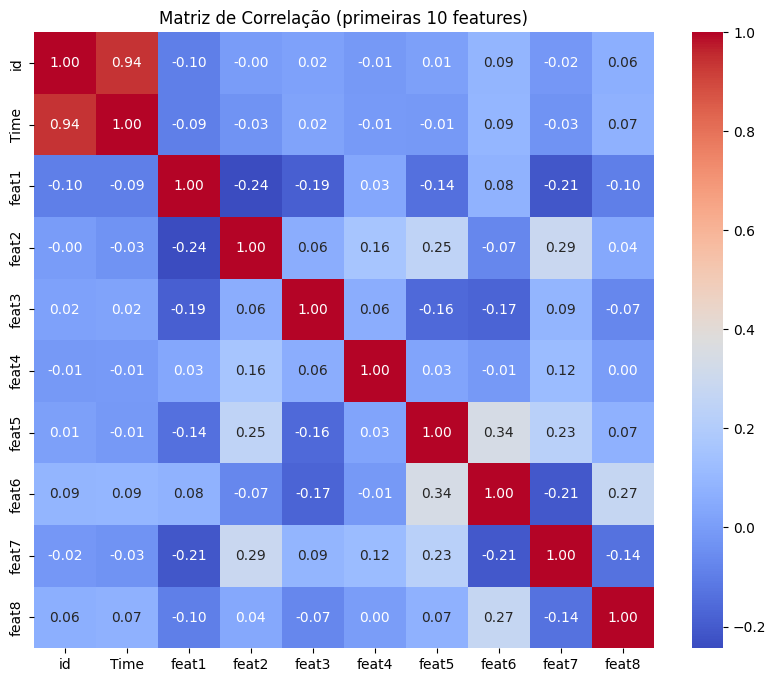

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(train.corr().iloc[:10, :10], annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlação (primeiras 10 features)')
plt.show()

# **Pré-processamento e Limpeza dos Dados**

## **Tratamento de Valores Ausentes**

In [18]:
train.isnull().sum()

,0
id,0
Time,0
feat1,0
feat2,0
feat3,0
feat4,0
feat5,0
feat6,0
feat7,0
feat8,0


In [19]:
test.isnull().sum()

,0
id,0
Time,0
feat1,0
feat2,0
feat3,0
feat4,0
feat5,0
feat6,0
feat7,0
feat8,0


## **Divisão dos Dados**

In [13]:
X = train.drop('IsFraud', axis=1)

In [14]:
y = train['IsFraud']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
print(f'Train shape: {X_train.shape}, Test shape: {X_test.shape}')
print(f'Train labels shape: {y_train.shape}, Test labels shape: {y_test.shape}')

Train shape: (105000, 31), Test shape: (45000, 31)
Train labels shape: (105000,), Test labels shape: (45000,)


# **Modelagem**

In [17]:
model = LogisticRegression()

In [18]:
model.fit(X_train, y_train)

c:\Users\lucas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(45000,))

# **Avaliação**

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_score = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)

In [21]:
print(f'Acurácia: {accuracy_score}')
print(f'Relatório de Classificação:\n{classification_report}')
print(f'Matriz de Confusão:\n {confusion_matrix}')

Acurácia: 0.9978444444444444
Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44912
           1       0.09      0.01      0.02        88

    accuracy                           1.00     45000
   macro avg       0.54      0.51      0.51     45000
weighted avg       1.00      1.00      1.00     45000

Matriz de Confusão:
 [[44902    10]
 [   87     1]]


# **Submissão**

In [22]:
test.head()

,id,Time,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,...,feat20,feat21,feat22,feat23,feat24,feat25,feat26,feat27,feat28,Transaction_Amount
0,150000,73899,-0.681234,-0.371212,0.385966,0.955703,2.064078,0.338827,-0.539452,-0.254046,...,0.183560,-0.253324,0.266668,-0.153829,0.455969,-0.503628,0.257588,-0.456685,-0.298919,30.42
1,150001,73899,-1.098947,-0.959377,0.324934,0.703908,1.090582,-1.595909,0.584548,0.260069,...,0.334764,0.130108,0.676928,-0.161070,-0.638011,-0.273424,0.711132,0.349967,0.141233,23.00
2,150002,73899,0.977029,-0.270984,0.471526,-1.232570,0.957537,-0.636602,-0.953060,-1.491744,...,0.355728,0.517912,1.175087,-0.325895,-0.362636,0.306037,0.004828,0.037389,0.058222,198.00
3,150003,73900,1.176658,-0.225816,-0.246600,0.015513,1.103831,1.229516,-1.527098,-0.459769,...,-0.152613,-0.104600,0.003800,-0.023180,-0.458338,0.481427,-0.381415,0.080165,0.027372,9.99
4,150004,73900,0.804828,-0.272967,0.959910,-1.117567,0.395748,0.589855,1.059880,-1.101203,...,-0.127818,-0.011849,0.078540,-0.241700,0.010130,0.302614,-0.259568,0.023127,0.056957,239.00


In [23]:
X_test = test
X_test.shape

(69129, 31)

In [25]:
y_pred_test = model.predict(X_test)
y_pred_test

array([0, 0, 0, ..., 0, 0, 0], shape=(69129,))

In [26]:
submission = pd.DataFrame({'id': test['id'], 'IsFraud': y_pred_test})
submission.head()

,id,IsFraud
0,150000,0
1,150001,0
2,150002,0
3,150003,0
4,150004,0


In [27]:
submission.to_csv('submission.csv', index=False)

:)